本文の流れ
+ 状態空間モデルの導出
    - 車輪型倒立振子の状態方程式の導出
    - モータの動特性の導出
    - 観測方程式の導出
    - 状態空間モデルの導出
+ 制御器(LQG)の設計
    - システムの可制御性・可観測性の確認
    - カルマンフィルタの設計
    - 状態フィードバックの設計
    - LQG制御器の設計
+ シミュレーション
    - シミュレーションの設定
    - シミュレーションの実行
    - シミュレーション結果の表示

# 状態空間モデルの導出

## 車輪型倒立振子の状態方程式の導出
Euler-Lagrangeの運動方程式を用いて、車輪型倒立振子の状態方程式を導出する。

今回は、車輪型倒立振子の座標系・パラメータを以下の図のように設定する。
また、物理パラメータを以下のように表記する。
+ $M_b$：車体の質量
+ $M_w$：車輪の質量
+ $I_b$：車体の重心周りの慣性モーメント
+ $I_w$：車輪の重心周りの慣性モーメント
+ $L$：車体の重心から車輪の重心までの距離
+ $r$：車輪の半径
+ $g$：重力加速度
+ $D_{\phi}$：車軸の粘性抵抗


<img src="wheel_inverted_pendulum_overview.jpg">

### 運動エネルギーの導出
運動エネルギー$T$には、車体の運動エネルギー$T_b$と車輪の運動エネルギー$T_w$がある。

さらに、車体の運動エネルギーは車体の重心の並進運動エネルギー$T_{bv}$と車体の回転運動エネルギー$T_{br}$に分けられる。
同様に、車輪も車輪の重心の並進運動エネルギー$T_{wv}$と車輪の回転運動エネルギー$T_{wr}$に分けられる。

まず、並進運動エネルギーについて考える。

車体の重心の座標$(x_b,y_b)$は、
$$
\begin{aligned}
x_b &= r(\theta + \phi) + L \sin \theta \\
y_b &= r + L \cos \theta
\end{aligned}
$$
である。よって、車体の並進運動エネルギー$T_{bv}$は、
$$
\begin{aligned}
T_{bv} &= \frac{1}{2} M_b \left( \dot{x}_b^2 + \dot{y}_b^2 \right) \\
&= \frac{1}{2} M_b \left\{ \left( r \left[\dot{\theta}+ \dot{\phi}\right] + L \dot{\theta} \cos \theta \right)^2 + \left(- L \dot{\theta} \sin \theta \right)^2 \right\}  \\
&= \frac{1}{2} M_b \left\{ r^2 \left[\dot{\theta}+ \dot{\phi}\right]^2 + 2rL\left[\dot{\theta}+ \dot{\phi}\right]\dot{\theta} \cos \theta + L^2 \dot{\theta}^2 \right\}  \\
\end{aligned}
$$
となる。

また、車輪の重心の座標$(x_w,y_w)$は、
$$
\begin{aligned}
x_w &= r (\theta + \phi) \\
y_w &= r
\end{aligned}
$$
である。よって、車輪の並進運動エネルギー$T_{wv}$は、
$$
\begin{aligned}
T_{wv} &= \frac{1}{2} M_w \left( \dot{x}_w^2 + \dot{y}_w^2 \right) \\
&= \frac{1}{2} M_w \left\{ \left( r \left[\dot{\theta}+ \dot{\phi}\right] \right)^2 + 0 \right\}  \\
&=\frac{1}{2} M_w r^2 \left(\dot{\theta}+ \dot{\phi}\right)^2
\end{aligned}
$$
となる。

次に、回転運動エネルギーについて考える。
車体の回転運動エネルギー$T_{br}$は、
$$
T_{br}= \frac{1}{2} I_b \dot{\theta}^2
$$
となる。そして、車輪の回転運動エネルギー$T_{wr}$は、
$$
\begin{aligned}
T_{wr}&= \frac{1}{2} I_w \left(\dot{\phi} + \dot{\theta} \right)^2 
\end{aligned}
$$
となる。

以上より、運動エネルギー$T$は、
$$
\begin{aligned}
T &= T_{bv} + T_{wv} + T_{br} + T_{wr} \\
&= \frac{1}{2}\left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right)^2 \\
&\quad + \frac{1}{2}\left[I_b + L^2M_b\right]\dot{\theta}^2 \\
&\quad +r L  M_b \dot{\theta} \left(\dot{\theta} + \dot{\phi}\right) \cos \theta
\end{aligned}
$$
となる。


### ポテンシャルエネルギーの導出
車体の位置エネルギー$U_b$、車輪の位置エネルギーは、それぞれ
$$
\begin{aligned}
U_b &= M_b g L \cos \theta \\
U_w &= 0
\end{aligned}
$$
である。よって、ポテンシャルエネルギー$U$は、
$$
\begin{aligned}
U &= U_b + U_w \\ 
&= M_b g L \cos \theta
\end{aligned}
$$
である。

### 散逸エネルギーの導出
車軸間の摩擦によってエネルギー損失が生じると仮定する。このとき、散逸エネルギー$F$は、
$$
F = \frac{1}{2} D_{\phi} \dot{\phi}^2
$$
となる。

### Euler-Lagrangeの運動方程式の導出
ラグランジアン$L$は、
$$
\begin{aligned}
L &= T - U\\
&= \frac{1}{2}\left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right)^2 \\
&\quad + \frac{1}{2}\left[I_b + L^2M_b\right]\dot{\theta}^2 \\
&\quad +r L  M_b \dot{\theta} \left(\dot{\theta} + \dot{\phi}\right) \cos \theta- g L M_b  \cos \theta
\end{aligned}
$$
となる。一般化座標$q$、一般化力$\tau$に対するEuler-Lagrangeの運動方程式は、
$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}} \right) - \frac{\partial L}{\partial q} + \frac{\partial F}{\partial \dot{q}} = \tau
$$
である。$\theta, \phi$に対するEuler-Lagrangeの運動方程式は、
$$
\begin{aligned}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} + \frac{\partial F}{\partial \dot{\theta}} &= \tau_\theta\\
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\phi}} \right) - \frac{\partial L}{\partial \phi} + \frac{\partial F}{\partial \dot{\phi}} &= \tau_\phi 
\end{aligned}
$$
である。ここで、$\tau_\theta, \tau_\phi$はそれぞれ、$\theta,\phi$座標系に加わる一般化力である。
まず$\theta$の運動方程式を計算する。
$$
\begin{aligned}
\frac{\partial L}{\partial \dot{\theta}} &= \left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right) + \left[I_b + L^2M_b\right]\dot{\theta} +r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \cos \theta\\
&= \left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \cos \theta \\
\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}} &= \frac{d}{dt}\left\{\left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \cos \theta\right\} \\
&=\left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + r L  M_b  \left(2\ddot{\theta} + \ddot{\phi}\right) \cos \theta - r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \dot{\theta}\sin \theta\\
\frac{\partial L}{\partial \theta} &= -rL M_b \dot{\theta}^2 \sin \theta  - rLM_b \dot{\phi}\dot{\theta}  \sin \theta + g L M_b  \sin \theta \\
\frac{\partial F}{\partial \dot{\theta}} &= 0 \\
\end{aligned}
$$
である。よって、$\theta$の運動方程式は、
$$
\begin{aligned}
&\left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + r L  M_b  \left(2\ddot{\theta} + \ddot{\phi}\right) \cos \theta - r L  M_b  \left(\bcancel{2}\dot{\theta} + \cancel{\dot{\phi}}\right) \dot{\theta}\sin \theta \\
&\quad +  \bcancel{rLM_b \dot{\theta}^2 \sin \theta} + \cancel{rLM_b  \dot{\phi}\dot{\theta}\sin \theta } -g L M_b  \sin \theta = \tau_\theta\\
\therefore &\left[I_b + L^2M_b +I_w + r^2\left(M_b + M_w\right) + 2r LM_b \cos \theta \right]\ddot{\theta} \\ 
&\quad+ \left[I_w + r^2\left(M_b + M_w\right) + rL M_b\cos \theta \right]\ddot{\phi} - r L  M_b  \dot{\theta}^2 \sin \theta - g L M_b  \sin \theta = \tau_\theta \\
\end{aligned}
$$
となる。次に$\phi$の運動方程式を計算する。
$$
\begin{aligned}
\frac{\partial L}{\partial \dot{\phi}} &= \left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right) +r L  M_b  \dot{\theta} \cos \theta\\
&= \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \dot{\theta} \cos \theta\\
\frac{d}{dt}\frac{\partial L}{\partial \dot{\phi}} &= \frac{d}{dt}\left\{\left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \dot{\theta} \cos \theta\right\} \\
&=\left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + rLM_b \ddot{\theta} \cos \theta - r L  M_b  \dot{\theta}^2 \sin \theta\\
\frac{\partial L}{\partial \phi} &= 0 \\
\frac{\partial F}{\partial \dot{\phi}} &= D_{\phi} \dot{\phi} \\
\end{aligned}
$$
である。よって、$\phi$の運動方程式は、
$$
\begin{aligned}
&\left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + rLM_b \ddot{\theta} \cos \theta - r L  M_b  \dot{\theta}^2 \sin \theta  + D_{\phi} \dot{\phi} = \tau_\phi \\
\therefore &\left[I_w + r^2\left(M_b + M_w\right) + rL M_b \cos \theta \right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right) \right]\ddot{\phi} + D_{\phi} \dot{\phi} - r L  M_b  \dot{\theta}^2 \sin \theta = \tau_\phi \\
\end{aligned}
$$
となる。ここで、方程式の定数をまとめるため、
$$
\begin{aligned}
a &= I_w + r^2\left(M_b + M_w\right) \\
b &= I_b + L^2M_b \\
c &= r L M_b \\
d &= gL M_b \\
\end{aligned}
$$ 
とおくと、$\theta,\phi$の運動方程式はそれぞれ、
$$
\begin{aligned}
\left(a + b + 2c\cos \theta \right)\ddot{\theta} + \left(a + c\cos \theta \right)\ddot{\phi} - c \dot{\theta}^2 \sin \theta - d \sin \theta &= \tau_\theta \\
\left(a + c\cos \theta \right)\ddot{\theta} + a\ddot{\phi} + D_{\phi} \dot{\phi} - c \dot{\theta}^2 \sin \theta &= \tau_\phi \\
\end{aligned}
$$
となる。この連立の運動方程式をシミュレーションに適するように、$\bm{x}=\begin{bmatrix}\theta & \phi & \dot{\theta} & \dot{\phi}\end{bmatrix}^\top$、$\bm{u}=\begin{bmatrix}\tau_\theta & \tau_\phi \end{bmatrix}^\top$とおいて、
$$
\begin{aligned}
\dot{\bm{x}} &= \bm{f}(\bm{x},\bm{u}) = \begin{bmatrix} f_1(\bm{x},\bm{u}) \\ f_2(\bm{x},\bm{u}) \\ f_3(\bm{x},\bm{u})\\ f_4(\bm{x},\bm{u})\end{bmatrix} \\
\end{aligned}
$$
の形になるように変形する。すると、
$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} = \begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ 
\frac{1}{ab - c^2 \cos^2 \theta }\begin{bmatrix} a & -(a + c \cos \theta) \\  -(a + c \cos \theta) & a + b + 2c\cos\theta  \end{bmatrix}\begin{bmatrix}\tau_\theta +  (c \dot{\theta}^2 + d)\sin \theta \\ \tau_\phi + c \dot{\theta}^2\sin \theta - D_\phi \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\end{aligned}
$$
となる。

ここで、各運動方程式の一般化力を求める。
一般化力の定義より、一般化力のする仕事$W$の変分$\delta W$は、
$$
\delta W = \tau_\theta \delta \theta + \tau_\phi \delta \phi
$$
と書ける。
今回、系に加わる外力として、
+ 車輪を駆動するトルク$\tau$
+ 車体の車輪からの距離$l$の位置にx軸方向に加わる外乱$f_d$

を考える。すると、これらが行う仕事の変分は、
$$
\delta W = \tau \delta \phi + f_d \delta x_b
$$
となる。ここで、$\delta x_b$はx軸方向の仮想変分である。特に、
$$
\begin{aligned}
\delta x_b &= \delta \left\{r(\theta + \phi) + l \sin \theta \right\} \\
&= r \delta \theta + r \delta \phi + l \cos \theta \delta \theta
\end{aligned}
$$
なので、
$$
\begin{aligned}
\delta W &= \tau \delta \phi + f_d \left(r \delta \theta + r \delta \phi + l \cos \theta \delta \theta\right) \\
&= (\tau + f_d r) \delta \phi + \left[f_d (r +  l \cos \theta)\right] \delta \theta
\end{aligned}
$$
となる。よって、係数比較により、
$$
\begin{aligned}
\tau_\theta &= f_d (r +  l \cos \theta) \\
\tau_\phi &= \tau + f_d r
\end{aligned}
$$
となる。


### シミュレーション
以上の導出結果の正当性を確認するために、シミュレーションを行う。

In [2]:
import numpy as np
import sympy as sp
import scipy as sc
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

from typing import List, Tuple, Dict, Callable, Union

In [57]:
class WheelInvertedPendulum:
   """
   車輪型倒立振子のシミュレータ
   """
   def __init__(self,M_b,M_w,I_b,I_w,L,r,g,D_phi, l, theta_init: float = 0.0, dtheta_init: float = 0.0,phi_init: float = 0.0, dphi_init: float = 0.0):
      self.M_b = M_b
      self.M_w = M_w
      self.I_b = I_b
      self.I_w = I_w
      self.L = L
      self.r = r
      self.g = g
      self.D_phi = D_phi
      self.theta = theta_init
      self.dtheta = dtheta_init
      self.phi = phi_init
      self.dphi = dphi_init
      self.l = l
      
      # 定数の計算
      self.a = I_w + r**2 * (M_b + M_w)
      self.b = I_b + L**2 * M_b
      self.c = r * L * M_b
      self.d = g * L * M_b
   
   def reset(self, theta_init: float = 0.0, dtheta_init: float = 0.0,phi_init: float = 0.0, dphi_init: float = 0.0):
      """
      姿勢の初期化

      Parameters
      ----------
      theta_init : float, optional
          車体の姿勢, by default 0.0
      dtheta_init : float, optional
          車体の姿勢の時間微分, by default 0.0
      phi_init : float, optional
          タイヤの車体からの回転角度, by default 0.0
      dphi_init : float, optional
          タイヤの車体からの回転角度の時間微分, by default 0.0
      """
      self.theta = theta_init
      self.dtheta = dtheta_init
      self.phi = phi_init
      self.dphi = dphi_init
   
   def dynamics(self,t:float,x_vec:np.ndarray, tau_func: Callable[[float, np.ndarray], float] = None, f_d_func:Callable[[float,np.ndarray], float]=None)-> np.ndarray:
      if tau_func is None:
         tau_func = lambda t, x: 0.0
      if f_d_func is None:
         f_d_func = lambda t, x: 0.0
      
      theta = x_vec[0]
      phi = x_vec[1]
      dtheta = x_vec[2]
      dphi = x_vec[3]   
      
      tau = tau_func(t, x_vec)
      f_d = f_d_func(t, x_vec)
      
      tau_theta = f_d *(self.r + self.l * np.cos(phi))
      tau_phi = tau + f_d *self.r
      
      A = np.array([[self.a, -(self.a + self.c * np.cos(theta))],
                    [-(self.a + self.c * np.cos(theta)), self.a + self.b + 2 * self.c * np.cos(theta)]])
      A /= self.a * self.b - self.c**2 * np.cos(theta)**2
      b = np.zeros(2)
      b[0] = tau_theta + (self.c*dtheta**2 + self.d)*np.sin(theta)
      b[1] = tau_phi + self.c*dtheta**2 *np.sin(theta)- self.D_phi*dphi
      
      func = np.zeros(4)
      func[0] = dtheta
      func[1] = dphi
      func[2:4,None] = A@b[:,None]
      
      return func
      
   

   def step(self, tau: float = 0.0,f_d:float =0.0, dt: float = 0.01) -> np.ndarray:
      """
      時間を進める
      
      Parameters
      ----------
      tau : float, optional
            車体に加えるトルク, by default 0.0
      f_d : float, optional
            車体に加える力, by default 0.0
      dt : float, optional
            時間の刻み幅, by default 0.01
      
      Returns
      -------
      np.ndarray
            状態ベクトル
      """
      tau_func = lambda t, x: tau
      f_d_func = lambda t, x: f_d 
      
      x_vec = np.array([self.theta, self.phi, self.dtheta, self.dphi])
      k1 = self.dynamics(0.0, x_vec, tau_func, f_d_func)
      k2 = self.dynamics(0.0, x_vec + dt/2*k1, tau_func, f_d_func)
      k3 = self.dynamics(0.0, x_vec + dt/2*k2, tau_func, f_d_func)
      k4 = self.dynamics(0.0, x_vec + dt*k3, tau_func, f_d_func)
      
      x_vec += dt/6*(k1 + 2*k2 + 2*k3 + k4)
      
      self.theta = x_vec[0]
      self.phi = x_vec[1]
      self.dtheta = x_vec[2]
      self.dphi = x_vec[3]
      
      return x_vec

In [68]:
#暫定的なトルクと外乱
# Maximum torque, Nm
tau_max = 3

def torque_control(t, x):
   F = np.array([[7.28536263, 0.2236068, 1.56361032, 0.26065262]])  
   theta, phi,theta_dot, phi_dot = x[0], x[1], x[2], x[3]
   if t < 15:
      # State-feedback control
      tau = np.clip(F @ x[:,None], -tau_max, tau_max)[0]
      
      # PID control
      # Kp, Ki, Kd = 30.0, 0.0, 0.0
      # tau = Kp * theta
   else:
      # Stop controlling
      tau = 0
   
   # # Zero torque for test
   # tau = 0
   
   return tau

def force_disturbance(t, x):
    if 5 <= t < 5.5:
        f_d = 5
    elif 9 <= t < 12:
        f_d = 5 * np.sin(2 * np.pi * 1 * (t - 9))
    else:
        f_d = 0
    
    # # Zero force for test
    # f_d = 0
    
    return f_d

In [69]:
#車体
M_b = 1.50
L = 0.30
I_b = M_b * L**2 / 3
#車輪
M_w = 0.75
r =0.10
I_w = M_w * r**2 / 2
D_phi=0.05
#重力加速度
g = 9.8
#外乱力点
l = 2*L

wheel_inverted_pendulum = WheelInvertedPendulum(M_b,M_w,I_b,I_w,L,r,g,D_phi,l)
func = lambda t, x: wheel_inverted_pendulum.dynamics(t,x,torque_control,force_disturbance)

In [70]:
# NumPy array for time
t_end = 20                        # Time to end simulation, s
dt = 0.01                         # Time slice, s
_t = np.arange(0, t_end, dt)      # Time array

# Initial conditions
theta_0 = np.radians(30)          # Initial pendulum angle, rad
x_w0 = 1                          # Initial wheel positon, m
phi_0 = x_w0 / r - theta_0       # Initial wheel angle with respect to pendulum
x0 = [theta_0,phi_0 ,0, 0]       # Initial state

# Now solve it, non-linear
sol = solve_ivp(func, [0, t_end], x0, t_eval = _t)


/tmp/ipykernel_44373/1236400704.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[1] = tau_phi + self.c*dtheta**2 *np.sin(theta)- self.D_phi*dphi


In [71]:
# ------------------------------------------------
# Post-processing of the solution, non-linear
# ------------------------------------------------

# State variables
_theta = (sol.y[0,:].T + np.pi) % (2 * np.pi) - np.pi
_phi = (sol.y[1,:].T + np.pi) % (2 * np.pi) - np.pi
_theta_dot = sol.y[2,:].T
_phi_dot = sol.y[3,:].T

# Position and velocity of wheel, theta + phi
_x_w =r * (sol.y[0,:].T + sol.y[1,:].T)
_v_w =r * (sol.y[2,:].T + sol.y[3,:].T)

# Reproduce control torque and disturbance force
_tau_cont = np.zeros_like(_t)
_f_d = np.zeros_like(_t)
for i, __t in enumerate(_t):
    _tau_cont[i] = torque_control(__t, sol.y[:,i])
    _f_d[i] = force_disturbance(__t, sol.y[:,i])

/tmp/ipykernel_44373/2266382207.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  _tau_cont[i] = torque_control(__t, sol.y[:,i])


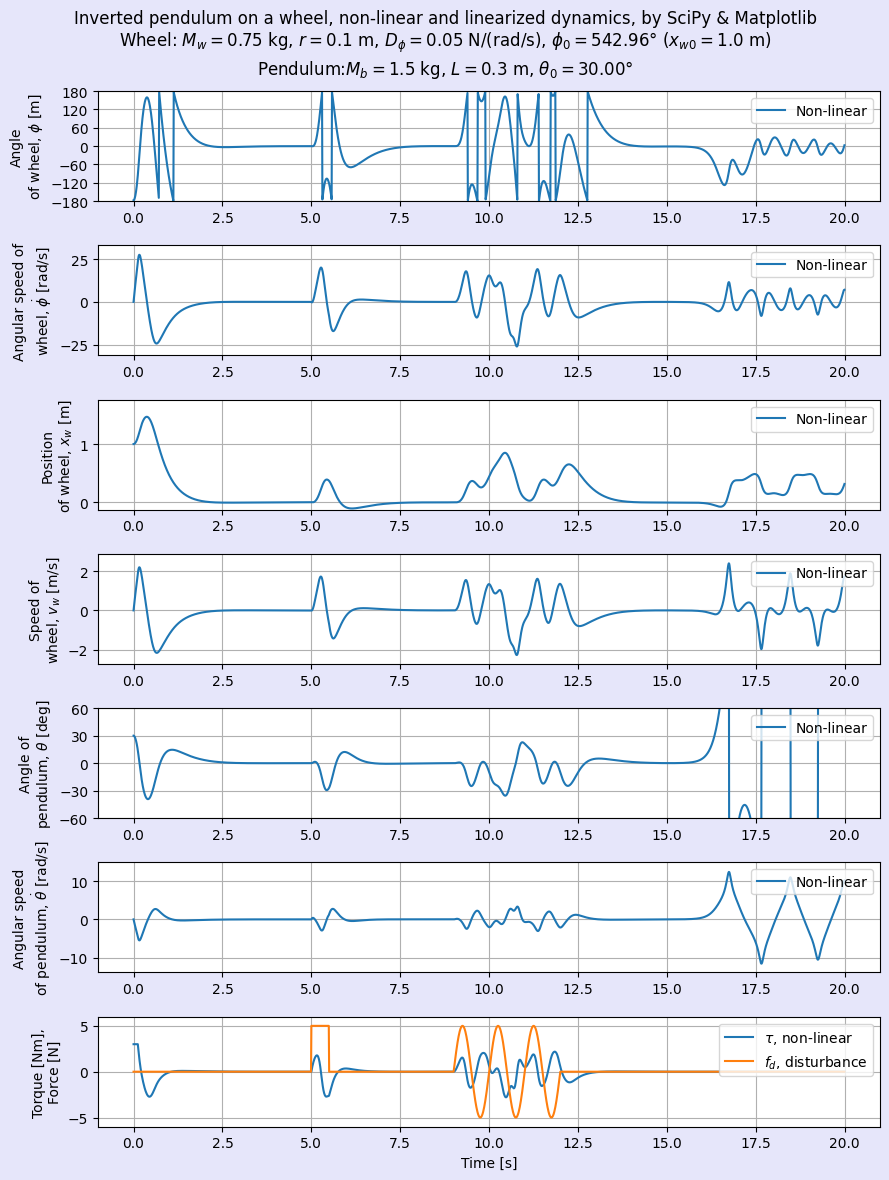

In [72]:
# ------------------------------------------------
# Time domain plots
# ------------------------------------------------

# Figure
plt.rcParams["font.size"] = 10
fig, ax = plt.subplots(7, 1, figsize = (9, 12))
fig.patch.set_facecolor('lavender')
fig.suptitle(f'Inverted pendulum on a wheel, non-linear and linearized dynamics, by SciPy & Matplotlib\nWheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), $\\phi_0 = {np.degrees(phi_0):.2f}\degree$ ($x_{{w0}} = {r * (theta_0 + phi_0):.1f}$ m)\nPendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {np.degrees(theta_0):.2f}\degree$')

# Plot wheel angle
ax[0].plot(_t, np.degrees(_phi), label = 'Non-linear')
# ax[0].plot(_t, np.degrees(_phi_lin), ls = '--', label = 'Linearized')
ax[0].set_ylim(np.min(np.degrees(_phi)) * 1.2, np.max(np.degrees(_phi)) * 1.2)
ax[0].set_ylim(-180, 180)
ax[0].set_yticks(range(-180, 240, 60))
ax[0].set_ylabel('Angle\nof wheel, $\phi$ [m]')
ax[0].legend(loc = 'upper right')
ax[0].grid()

# Plot angular speed of wheel
ax[1].plot(_t, _phi_dot, label = 'Non-linear')
# ax[1].plot(_t, _phi_dot_lin, ls = '--', label = 'Linearized')
ax[1].set_ylim(np.min(_phi_dot) * 1.2, np.max(_phi_dot) * 1.2)
ax[1].set_ylabel('Angular speed of\nwheel, $\dot{\phi}$ [rad/s]')
ax[1].legend(loc = 'upper right')
ax[1].grid()

# Plot wheel position
ax[2].plot(_t, _x_w, label = 'Non-linear')
# ax[2].plot(_t, _x_w_lin, ls = '--', label = 'Linearized')
ax[2].set_ylim(np.min(_x_w) * 1.2, np.max(_x_w) * 1.2)
ax[2].set_ylabel('Position\nof wheel, $x_{w}$ [m]')
ax[2].legend(loc = 'upper right')
ax[2].grid()

# Plot speed of wheel
ax[3].plot(_t, _v_w, label = 'Non-linear')
# ax[3].plot(_t, _v_w_lin, ls = '--', label = 'Linearized')
ax[3].set_ylim(np.min(_v_w) * 1.2, np.max(_v_w) * 1.2)
ax[3].set_ylabel('Speed of\nwheel, $v_{w}$ [m/s]')
ax[3].legend(loc = 'upper right')
ax[3].grid()

# Plot angle of pendulum
ax[4].plot(_t, np.degrees(_theta), label = 'Non-linear')
# ax[4].plot(_t, np.degrees(_theta_lin), ls = '--', label = 'Linearized')
ax[4].set_ylabel('Angle of\npendulum, $\\theta$ [deg]')
ax[4].set_ylim(-60, 60)
ax[4].set_yticks(range(-60, 90, 30))
ax[4].legend(loc = 'upper right')
ax[4].grid()

# Plot angular speed of pendulum
ax[5].plot(_t, _theta_dot, label = 'Non-linear')
# ax[5].plot(_t, _theta_dot_lin, ls = '--', label = 'Linearized')
ax[5].set_ylim(np.min(_theta_dot) * 1.2, np.max(_theta_dot) * 1.2)
ax[5].set_ylabel('Angular speed\nof pendulum, $\dot{\\theta}$ [rad/s]')
ax[5].legend(loc = 'upper right')
ax[5].grid()

# Control torque
ax[6].plot(_t, _tau_cont, label = '$\\tau$, non-linear')
# ax[6].plot(_t, _tau_cont_lin, ls = '--', label = '$\\tau$, linearized')
ax[6].plot(_t, _f_d, label = '$f_{d}$, disturbance')
ax[6].set_ylim(np.min([_tau_cont, _f_d]) * 1.2, np.max([_tau_cont, _f_d]) * 1.2)
ax[6].set_xlabel('Time [s]')
ax[6].set_ylabel('Torque [Nm],\nForce [N]')
ax[6].legend(loc = 'upper right')
ax[6].grid()

fig.tight_layout()

NameError: name '_M' is not defined

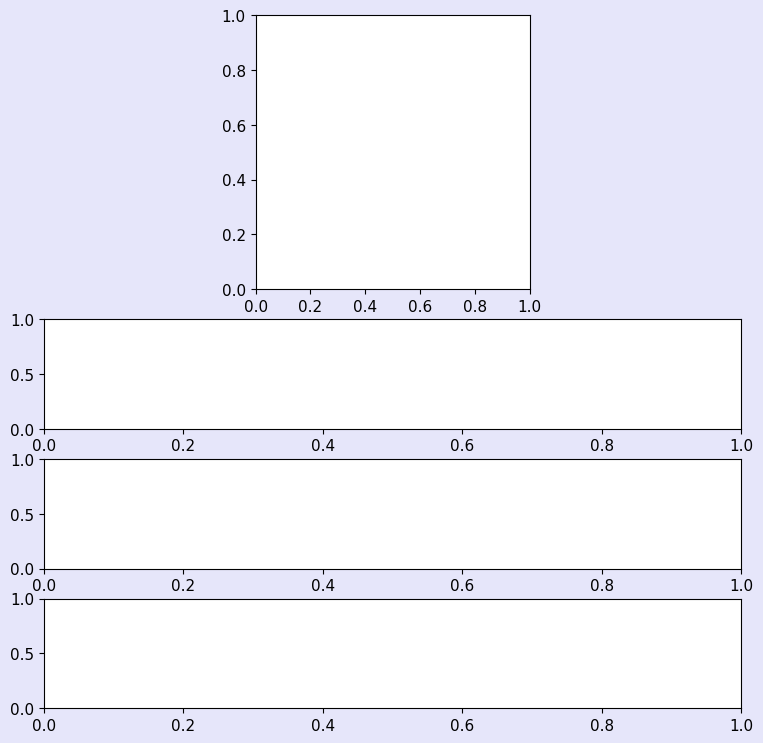

In [73]:
# ------------------------------------------------
# Animation theatre
# ------------------------------------------------

# Size of theatre
K_tscale = 3

# Alpha of linearized pendulum
alpha_lin = 0.4

# Color map
cmap = plt.get_cmap('tab10')

# Plot theatre
plt.rcParams["font.size"] = 11
fig, ax = plt.subplots(4, 1, figsize = (9, 9), gridspec_kw={'height_ratios': [2.5, 1, 1, 1]})
fig.patch.set_facecolor('lavender')
ax[0].set_aspect('equal')
fig.suptitle(f'Inverted pendulum on a wheel, non-linear and linearized dynamics, by SciPy & Matplotlib\nWheel: $M = {_M}$ kg, $a = {_a}$ m, $\mu_w = {_mu_w}$ N/(rad/s), $\\phi_0 = {np.degrees(phi_0):.2f}\degree$  ($x_{{w0}} = {_a * (theta_0 + phi_0):.1f}$ m)\nPendulum:$m = {_m}$ kg, $2l = {2 * _l}$ m, $\mu_p = {_mu_p}$ Nm/(rad/s), $\\theta_0 = {np.degrees(theta_0):.2f}\degree$')

# Set axis for animation
ax[0].set_xlim(-K_tscale, K_tscale)
ax[0].set_xlabel('x [m]')
ax[0].set_ylim(-K_tscale / 5, K_tscale / 2)
ax[0].set_ylabel('z [m]')
ax[0].grid()
ax[0].set_axisbelow(True)

# Show state feedback gain
np.set_printoptions(formatter={'float': '{:.2f}'.format})
ax[0].text(-K_tscale + 0.1, -K_tscale / 20, '$x = [\\theta, \\dot{\\theta}, \phi, \\dot{\phi}]^T$', va = 'center')
# ax[0].text(-K_tscale + 0.1, -2 * K_tscale / 20, f'P control: $K_{{p}} = {30}$ Nm/rad', va = 'center')
ax[0].text(-K_tscale + 0.1, -2 * K_tscale / 20, f'$F = ${F}', va = 'center')
ax[0].text(-K_tscale + 0.1, -3 * K_tscale / 20, f'LQR: diag Q = {_Q.diagonal()}, R = {_R[0]}', va = 'center')

# Show time
text_time = ax[0].text(-K_tscale + 0.1, K_tscale / 2 - K_tscale / 20, f'$t = {_t[0]:.2f} s$', va = 'center')

# Draw floor
ax[0].plot([-10, 10], [0, 0], lw = 2, color = 'black')

# Draw wheel
# Original non-linear
wheel = patches.Circle(xy = (_x_w[0], _a), radius = _a, lw = 1.5, ec = 'blue', fc = 'lightblue')
ax[0].add_patch(wheel)
wheel_lin = patches.Circle(xy = (_x_w_lin[0], _a), radius = _a, lw = 1.5, ec = 'blue', fc = 'lightblue', alpha = alpha_lin)
ax[0].add_patch(wheel_lin)

# Draw wheel angle marker
line_angle, = ax[0].plot([_x_w[0], _x_w[0] + _a * np.sin(_theta[0] + _phi[0])], \
    [_a, _a + _a * np.cos(_theta[0] + _phi[0])], lw = 1.5, c = 'red')
line_angle_lin, = ax[0].plot([_x_w_lin[0], _x_w_lin[0] + _a * np.sin(_theta_lin[0] + _phi_lin[0])], \
    [_a, _a + _a * np.cos(_theta_lin[0] + _phi_lin[0])], lw = 1.5, c = 'red', alpha = alpha_lin)

# Draw pendulum
# Original non-linear
pendulum, = ax[0].plot([_x_w[0], _x_w[0] + 2 * _l * np.sin(_theta[0])], [_a, _a + 2 * _l * np.cos(_theta[0])], \
    lw = 3, color = 'blue')
pendulum_lin, = ax[0].plot([_x_w_lin[0], _x_w_lin[0] + 2 * _l * np.sin(_theta_lin[0])], [_a, _a + 2 * _l * np.cos(_theta_lin[0])], \
    lw = 3, color = 'blue', alpha = alpha_lin)

# Show angle of pendulum over it
# Original non-linear
text_angle = ax[0].text(_x_w[0] + 2 * _l * 1.1 * np.sin(_theta[0]), \
    _a + 2 * _l * 1.1 * np.cos(_theta[0]), \
    f'${np.degrees(_theta[0]):.3f}\degree$', ha = 'center', va = 'bottom')
text_angle_lin = ax[0].text(_x_w_lin[0] + 2 * _l * 1.1 * np.sin(_theta_lin[0]), \
    _a + 2 * _l * 1.1 * np.cos(_theta_lin[0]), \
    f'${np.degrees(_theta_lin[0]):.3f}\degree$', ha = 'center', va = 'bottom', alpha = alpha_lin)

# Show control and disturbance forces as arrows
K_fscale = K_tscale / 20

# # Original non-linear
# arrow_cont = ax[0].arrow(x_c[0] - w_cart / 2 * np.sign(f_cont[0]) - K_fscale * f_cont[0], \
#     h_cart / 2, K_fscale * f_cont[0], 0, length_includes_head = True, \
#     width = K_tscale * 0.01, color = 'blue', alpha = 0.6)

arrow_disturb = ax[0].arrow(_x_w[0] + 2 * _l * np.sin(_theta[0]) - K_fscale * _f_d[0], _a + 2 * _l * np.cos(_theta[0]), \
    K_fscale * _f_d[0], 0, length_includes_head = True, \
    width = K_tscale * 0.01, color = cmap(2), alpha = 0.8)
arrow_disturb_lin = ax[0].arrow(_x_w_lin[0] + 2 * _l * np.sin(_theta_lin[0]) - K_fscale * _f_d_lin[0], _a + 2 * _l * np.cos(_theta_lin[0]), \
    K_fscale * _f_d_lin[0], 0, length_includes_head = True, \
    width = K_tscale * 0.01, color = cmap(2), alpha = alpha_lin * 0.8)

# Time-domain plots
# Plot speed of cart
ax[1].plot(_t, _v_w, label = 'Non-linear', ls = '-')
ax[1].plot(_t, _v_w_lin, label = 'Linearized', ls = '--')
line_time_v_w, = ax[1].plot([_t[0], _t[0]], ax[1].get_ylim(), lw = 1, c = 'red') 
ax[1].set_ylim(np.min(_v_w) * 1.2, np.max(_v_w) * 1.2)
ax[1].set_ylabel('Speed of wheel, $v_{w}$\n$(= a (\dot{\\theta} + \dot{\phi}))$ m/s]')
ax[1].legend(loc = 'upper right')
ax[1].grid()

# Plot angular speed of pendulum
ax[2].plot(_t, _theta_dot, label = 'Non-linear', ls = '-')
ax[2].plot(_t, _theta_dot_lin, label = 'Linearized', ls = '--')
line_time_omega_p, = ax[2].plot([_t[0], _t[0]], ax[2].get_ylim(), lw = 1, c = 'red')
ax[2].set_ylim(np.min(_theta_dot) * 1.2, np.max(_theta_dot) * 1.2)
ax[2].set_ylabel('Angular speed of\npendulum, $\dot{\\theta}$ [rad/s]')
ax[2].legend(loc = 'upper right')
ax[2].grid()

# # Plot torque
ax[3].plot(_t, _tau_cont, label = '$\\tau$, non-linear', ls = '-')
ax[3].plot(_t, _tau_cont_lin, label = '$\\tau$, linearized', ls = '--')
ax[3].plot(_t, _f_d, label = '$f_{d}$, disturbance')
line_time_torque, = ax[3].plot([_t[0], _t[0]], ax[3].get_ylim(), lw = 1, c = 'red')
ax[3].set_ylim(np.min([_tau_cont, _f_d]) * 1.2, np.max([_tau_cont, _f_d]) * 1.2)
ax[3].set_xlabel('Time [s]')
ax[3].set_ylabel('Torque, $\\tau$ [Nm],\nForce, $f_{d}$ [N]')
ax[3].legend(loc = 'upper right')
ax[3].grid()

fig.tight_layout()

## モーターの動特性の導出


## 観測方程式の導出